# glyph-baseline

This notebook investigates how to line all the glyphs to baseline when rendering PNG.

## load the lib

In [1]:
import os
import sys

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '..', 'fonty'))

In [3]:
sys.path.append('/usr/lib/python3/dist-packages/')
import font_processing

In [6]:
!wget https://github.com/mrbvrz/segoe-ui-linux/raw/master/font/segoeui.ttf

--2023-08-18 08:41:51--  https://github.com/mrbvrz/segoe-ui-linux/raw/master/font/segoeui.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrbvrz/segoe-ui-linux/master/font/segoeui.ttf [following]
--2023-08-18 08:41:51--  https://raw.githubusercontent.com/mrbvrz/segoe-ui-linux/master/font/segoeui.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 758808 (741K) [application/octet-stream]
Saving to: ‘segoeui.ttf’

segoeui.ttf         100%[===================>] 741.02K  --.-KB/s    in 0.1s    

2023-08-18 08:41:52 (5.63 MB/s) - ‘segoeui.ttf’ saved [758808/758808]



In [8]:
font_processor = font_processing.FontProcessor('segoeui.ttf', flip_v=True)

The following table(s) in the font have been ignored by FontForge
  Ignoring 'DSIG' digital signature table
  Ignoring 'LTSH' linear threshold table
  Ignoring 'VDMX' vertical device metrics table
  Ignoring 'hdmx' horizontal device metrics table
This font contains both a 'kern' table and a 'GPOS' table.
  The 'kern' table will only be read if there is no 'kern' feature in 'GPOS'.


In [9]:
font_processor.save_svg_font('SegoeUI-Regular.svg')

In [7]:
import matplotlib.pyplot as plt

CPU times: user 38.2 ms, sys: 9.61 ms, total: 47.8 ms
Wall time: 50.5 ms


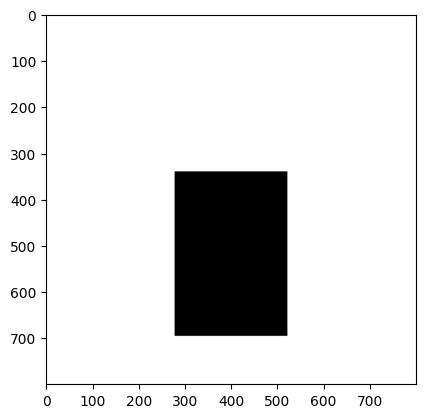

In [63]:
%%time
plt.imshow(
    font_processor.glyph2array(
        font_processor.glyphs[1524],
        glyph_size_proportion=1,
        image_w=800,
        image_h=800
    )
)

## calcualte baseline

In [8]:
def calculate_transform(
    picture_height: int, picture_width: int,
    cap_height: int, vector_width: int,
    baseline_y: int = 0, baseline_x: int = 0,
    glyph_proportion: int = 1,
    flip_v: bool = False
):

    vector_ymin, vector_ymax = baseline_y, cap_height
    vector_xmin = baseline_x
    
    glyph_height = (glyph_proportion * picture_height) / (glyph_proportion + 2)
    padding_y = (picture_height - glyph_height) / 2

    glyph_ymin, glyph_ymax = padding_y, padding_y + glyph_height
    
    translating_y = glyph_ymin - vector_ymin
    scaling = (glyph_ymax - glyph_ymin) / (vector_ymax - vector_ymin)

    padding_x = (picture_width - vector_width * scaling) / 2
    glyph_xmin = (picture_width - padding_x) / 2
    glyph_width = vector_width * scaling
    translating_x = glyph_xmin - vector_xmin + (picture_width - glyph_width) / 2
    print('glyph_xmin', glyph_xmin, 'picture_width', picture_width, 'glyph_width', glyph_width)

    return (
        (picture_width - translating_x, picture_height - translating_y),
        (scaling, scaling if not flip_v else -scaling)
    )

### calculating experiments

In [9]:
[(i, glyph) for i, glyph in enumerate(font_processor.glyphs) if glyph.glyph_name=='AEacute']

[(78,
  Glyph(d='M231 377l-46 -119h132v332h-3q-20 -54 -41.5 -107t-41.5 -106zM-1 0l264 656h319v-70h-189v-205h147v-71h-147v-239h198v-71h-274v191h-158l-73 -191h-87zM391 697l-36 42l141 128l47 -55z', glyph_name='AEacute', unicode='Ǽ', attrs={}))]

(530.0, 0.0, 656.0, 0.0)
glyph_xmin 47.51219512195122 vector_xmin 0 image_w 128 glyph_width 62.04878048780489

            <svg
                xmlns='http://www.w3.org/2000/svg'
                xmlns:xlink='http://www.w3.org/1999/xlink'
                width='128' height='128'
                viewPort='0 0 128 128'
            >
                <rect width='128' height='128' fill='#fff' />
                <path
                    d='M114 0v656h406v-70h-322v-206h272v-71h-272v-238h332v-71h-416z'
                    fill='#000'
                    transform='translate(47.51219512195122,102.4) scale(0.11707317073170734,-0.11707317073170734)'
                />
            </svg>
        


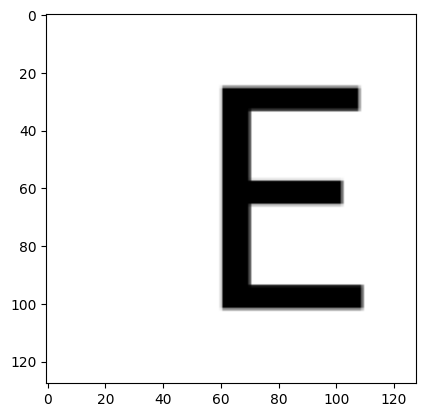

In [10]:
plt.imshow(
    font_processor.glyph2array(font_processor.glyphs[6], glyph_size_proportion=3)
)

In [30]:
font_processor.glyphs[78]

Glyph(d='M231 377l-46 -119h132v332h-3q-20 -54 -41.5 -107t-41.5 -106zM-1 0l264 656h319v-70h-189v-205h147v-71h-147v-239h198v-71h-274v191h-158l-73 -191h-87zM391 697l-36 42l141 128l47 -55z', glyph_name='AEacute', unicode='Ǽ', attrs={})

In [13]:
calculate_transform(
    picture_height=128, picture_width=128,
    cap_height=656, vector_width=530,
    baseline_y=0, glyph_proportion=3,
    flip_v=True
)

glyph_xmin 47.51219512195122 picture_width 128 glyph_width 62.04878048780489


((47.51219512195122, 102.4), (0.11707317073170734, -0.11707317073170734))

In [ ]:
font_processor._font

In [22]:
font_processor._font.capHeight

656.0

In [25]:
picture_height = 128

In [33]:
p = 2

In [45]:
glyph_height = (p * picture_height) / (p + 2)

glyph_height

64.0

In [46]:
gutter = (picture_height - glyph_height) / 2

gutter

32.0

In [47]:
vector_ymin, vector_ymax = 0, font_processor._font.capHeight

vector_ymin, vector_ymax

(0, 656.0)

In [50]:
glyph_ymin, glyph_ymax = gutter, gutter + glyph_height

glyph_ymin, glyph_ymax

(32.0, 96.0)

In [51]:
translate_y = glyph_ymin - vector_ymin

translate_y

32.0

In [52]:
scale_y = (glyph_ymax - glyph_ymin) / (vector_ymax - vector_ymin)

scale_y

0.0975609756097561

In [53]:
def transformation(x):
    return x * scale_y + translate_y

In [56]:
transformation(656)

96.0

In [62]:
{
    attr: getattr(font_processor._font.math, attr)
    for attr in dir(font_processor._font.math)
}


{'AccentBaseHeight': 486,
 'AxisHeight': 330,
 'DelimitedSubFormulaMinHeight': 1500,
 'DisplayOperatorMinHeight': 0,
 'FlattenedAccentBaseHeight': 656,
 'FractionDenominatorDisplayStyleGapMin': 150,
 'FractionDenominatorDisplayStyleShiftDown': 0,
 'FractionDenominatorGapMin': 50,
 'FractionDenominatorShiftDown': 0,
 'FractionNumeratorDisplayStyleGapMin': 150,
 'FractionNumeratorDisplayStyleShiftUp': 0,
 'FractionNumeratorGapMin': 50,
 'FractionNumeratorShiftUp': 0,
 'FractionRuleThickness': 50,
 'LowerLimitBaselineDropMin': 0,
 'LowerLimitGapMin': 0,
 'MathLeading': 0,
 'MinConnectorOverlap': 20,
 'OverbarExtraAscender': 50,
 'OverbarRuleThickness': 50,
 'OverbarVerticalGap': 150,
 'RadicalDegreeBottomRaisePercent': 60,
 'RadicalDisplayStyleVerticalGap': 171,
 'RadicalExtraAscender': 50,
 'RadicalKernAfterDegree': -555,
 'RadicalKernBeforeDegree': 277,
 'RadicalRuleThickness': 50,
 'RadicalVerticalGap': 50,
 'ScriptPercentScaleDown': 80,
 'ScriptScriptPercentScaleDown': 60,
 'SkewedFra

In [65]:
{
    attr: getattr(font_processor._font.canonicalContours(), attr)
    for attr in dir(font_processor._font.canonicalContours())
}


{'__class__': fontforge.font,
 '__contains__': <method-wrapper '__contains__' of fontforge.font object at 0x7f1768612930>,
 '__delattr__': <method-wrapper '__delattr__' of fontforge.font object at 0x7f1768612930>,
 '__dir__': <function font.__dir__()>,
 '__doc__': 'FontForge Font object',
 '__eq__': <method-wrapper '__eq__' of fontforge.font object at 0x7f1768612930>,
 '__format__': <function font.__format__(format_spec, /)>,
 '__ge__': <method-wrapper '__ge__' of fontforge.font object at 0x7f1768612930>,
 '__getattribute__': <method-wrapper '__getattribute__' of fontforge.font object at 0x7f1768612930>,
 '__getitem__': <method-wrapper '__getitem__' of fontforge.font object at 0x7f1768612930>,
 '__gt__': <method-wrapper '__gt__' of fontforge.font object at 0x7f1768612930>,
 '__hash__': <method-wrapper '__hash__' of fontforge.font object at 0x7f1768612930>,
 '__init__': <method-wrapper '__init__' of fontforge.font object at 0x7f1768612930>,
 '__init_subclass__': <function font.__init_su

In [64]:
font_processor._font.canonicalContours()

<fontforge.font at 0x0x7f1768612930 "SourceCodePro-Regular">